In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import mlrose_hiive as mlr
from mlrose_hiive import Queens, DiscreteOpt, random_hill_climb
from mlrose_hiive import SARunner, GARunner, RHCRunner
from array import array
import importlib
import numpy as np
import helpers #import the module here, so that it can be reloaded.
importlib.reload(helpers)
import time
import joblib

In [6]:
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
   # Initialize counter
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                   # If no attacks, then increment counter
                    fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlr.CustomFitness(queens_max)
eval_func = fitness_cust

In [7]:
N = 8
max_iters = 5000
numTrials = 5
restarts = [25, 75, 100]
max_attempts = [25, 50, 75, 100, 125, 150]
labels = ['max_attempts', 'restarts', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for a in max_attempts:
    for r in restarts:
        best_fitnesses_run=[]
        run_times_run=[]
        iterations_run=[]
        for i in range(5):
            prob = mlr.DiscreteOpt(N, eval_func, max_val=N)
            start_time = time.perf_counter()
            best_state, best_fitness, curve = mlr.random_hill_climb(prob, max_attempts=a, max_iters=max_iters, restarts=r, curve=True)
            run_time = time.perf_counter() - start_time
            best_fitnesses_run.append(best_fitness)
            run_times_run.append(run_time)
            stopped_at = len(curve)
            iterations_run.append(stopped_at)
            joblib.dump(pd.DataFrame.from_records(curve), f"queens/rhc/max_attempts{a},restarts{r},run{i}_curve.pkl")
            
        results_list.append([a, r, np.mean(run_times_run), np.mean(best_fitnesses_run), np.mean(iterations_run)])

rhc_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(rhc_results, "queens/rhc/queens_rhc_results.pkl")

NameError: name 'temp' is not defined

In [91]:
rhc_results.sort_values(by="best_fitness", ascending=False)

,max_attempts,restarts,run_time,best_fitness,stopped_at
17,150,100,1.265764,28.0,278.8
16,150,75,0.973631,28.0,254.4
2,25,100,0.290001,28.0,55.4
3,50,25,0.131047,28.0,118.4
4,50,75,0.380547,28.0,122.0
5,50,100,0.519926,28.0,115.2
6,75,25,0.178626,28.0,148.4
7,75,75,0.551858,28.0,153.4
8,75,100,0.751907,28.0,163.8
1,25,75,0.216811,28.0,62.4


In [103]:
N = 8
max_iters = 5000
numTrials = 5
temps = [1, 5, 10, 50, 100]
max_attempts = [25, 50, 75, 100, 125, 150]
labels = ['max_attempts', 'temp', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for a in max_attempts:
    for temp in temps:
        best_fitnesses_run=[]
        run_times_run=[]
        iterations_run=[]
        for i in range(5):
            prob = mlr.DiscreteOpt(N, eval_func, max_val=N)
            start_time = time.perf_counter()
            best_state, best_fitness, curve = mlr.simulated_annealing(prob, max_attempts=a, max_iters=max_iters, schedule=mlr.GeomDecay(init_temp=temp), curve=True)
            run_time = time.perf_counter() - start_time
            best_fitnesses_run.append(best_fitness)
            run_times_run.append(run_time)
            stopped_at = len(curve)
            iterations_run.append(stopped_at)
            joblib.dump(pd.DataFrame.from_records(curve), f"queens/sa/max_attempts{a},temp{temp},run{i}_curve.pkl")
            
        results_list.append([a, temp, np.mean(run_times_run), np.mean(best_fitnesses_run), np.mean(iterations_run)])

sa_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(df_results, "queens/sa/queens_rhc_results.pkl")

['queens/sa/queens_rhc_results.pkl']

In [104]:
sa_results

,max_attempts,temp,run_time,best_fitness,stopped_at
0,25,1,0.018867,27.0,207.8
1,25,5,0.029484,27.0,364.2
2,25,10,0.034017,26.8,402.6
3,25,50,0.050303,27.2,578.2
4,25,100,0.063517,26.8,717.2
5,50,1,0.018448,27.6,263.4
6,50,5,0.041614,27.4,571.2
7,50,10,0.043657,27.2,557.2
8,50,50,0.060239,27.4,767.0
9,50,100,0.071129,27.2,881.8


In [87]:
attempts = [10, 100, 1000]
populations = [100, 200, 300, 400]
mutation_probs = [0.1, 0.2, 0.3]
labels = ['max_attempts', 'population_size', 'mutation_probability', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for a in attempts:
    for pop in populations:
        for prob in mutation_probs:
            best_fitnesses_run=[]
            run_times_run=[]
            iterations_run=[]
            for i in range(5):
                problem = mlr.DiscreteOpt(N, eval_func, max_val=N)
                start_time = time.perf_counter()
                (best_state, best_fitness, curve) = mlr.genetic_alg(
                    problem,
                    pop_size=pop,
                    mutation_prob = prob,
                    max_attempts=a,
                    max_iters=max_iters,
                    curve=True,
                    random_state=1
                )
                run_time = time.perf_counter() - start_time
                best_fitnesses_run.append(best_fitness)
                run_times_run.append(run_time)
                stopped_at = len(curve)
                iterations_run.append(stopped_at)
                joblib.dump(pd.DataFrame.from_records(curve), f"queens/ga/max_attempts{a},pop{pop},mut{prob},run{i}_curve.pkl")

        results_list.append((
            a,
            pop, 
            prob, 
            np.mean(run_times_run), 
            np.mean(best_fitnesses_run),
            np.mean(iterations_run),
        ))

ga_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(df_results, "queens/ga/queens_ga_results.pkl")

['queens/ga/queens_ga_results.pkl']

In [88]:
ga_results

,max_attempts,population_size,mutation_probability,run_time,best_fitness,stopped_at
0,10,100,0.3,0.185303,27.0,18.0
1,10,200,0.3,0.570881,28.0,27.0
2,10,300,0.3,0.351797,26.0,11.0
3,10,400,0.3,0.506620,27.0,12.0
4,100,100,0.3,1.295332,28.0,127.0
5,100,200,0.3,2.467436,28.0,117.0
6,100,300,0.3,3.536243,27.0,112.0
7,100,400,0.3,5.245603,28.0,123.0
8,1000,100,0.3,10.808071,28.0,1027.0
9,1000,200,0.3,21.674313,28.0,1017.0


In [98]:
populations = [100, 200, 300, 400]
probs = [0.1, 0.2, 0.3]
labels = ['population_size', 'keep_pct', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for pop in populations:
    for prob in probs:
        best_fitnesses_run=[]
        run_times_run=[]
        iterations_run=[]
        for i in range(5):                
            problem = mlr.DiscreteOpt(N, eval_func, max_val=N)
            start_time = time.perf_counter()
            best_state, best_fitness, curve = mlr.mimic(
                problem,
                pop_size=pop,
                keep_pct=prob,
                max_iters=5000,
                curve=True,
            )
            run_time = time.perf_counter() - start_time
            best_fitnesses_run.append(best_fitness)
            run_times_run.append(run_time)
            stopped_at = len(curve)
            iterations_run.append(stopped_at)
            joblib.dump(pd.DataFrame.from_records(curve), f"queens/mimic/pop{pop},mut{prob},run{i}_curve.pkl")

        results_list.append((
            pop, 
            prob, 
            np.mean(run_times_run), 
            np.mean(best_fitnesses_run),
            np.mean(iterations_run),
        ))

mimic_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(mimic_results, "queens/mimic/queens_mimic_results.pkl")

['queens/mimic/queens_mimic_results.pkl']

In [99]:
mimic_results

,population_size,keep_pct,run_time,best_fitness,stopped_at
0,100,0.1,0.442662,25.8,11.2
1,100,0.2,0.429221,26.4,13.0
2,100,0.3,0.439700,26.2,11.6
3,200,0.1,0.472137,26.8,12.2
4,200,0.2,0.510943,26.8,12.8
5,200,0.3,0.507588,27.2,13.8
6,300,0.1,0.527592,27.2,12.8
7,300,0.2,0.589006,27.4,13.8
8,300,0.3,0.671550,27.4,16.4
9,400,0.1,0.552313,27.0,12.4


Text(0.5, 1.0, 'Fitness over Iterations, N=8')

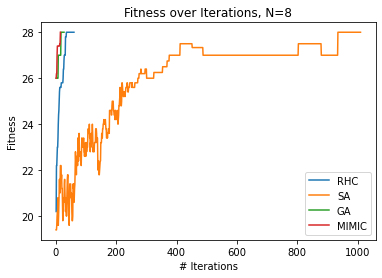

In [126]:
rhc_fitnesses = []
sa_fitnesses = []
ga_fitnesses = []
mimic_fitnesses = []

for i in range(5):
    tmp = joblib.load(f"queens/rhc/max_attempts{25},restarts{100},run{i}_curve.pkl")
    tmp2 = joblib.load(f"queens/sa/max_attempts{75},temp{5},run{i}_curve.pkl")
    tmp3 = joblib.load(f"queens/ga/max_attempts{10},pop{200},mut{0.3},run{i}_curve.pkl")
    tmp4 = joblib.load(f"queens/mimic/pop{300},mut{0.2},run{i}_curve.pkl")

    rhc_fitnesses.append(tmp[0].values)
    sa_fitnesses.append(tmp2[0].values)
    ga_fitnesses.append(tmp3[0].values)
    mimic_fitnesses.append(tmp4[0].values)
    
rhc_avg = helpers.avg_nested_lists(rhc_fitnesses)
sa_avg = helpers.avg_nested_lists(sa_fitnesses)
ga_avg = helpers.avg_nested_lists(ga_fitnesses)
mimic_avg = helpers.avg_nested_lists(mimic_fitnesses)
plt.plot(range(1, len(rhc_avg)+1), rhc_avg, label="RHC")
plt.plot(range(1, len(sa_avg)+1), sa_avg, label="SA")
plt.plot(range(1, len(ga_avg)+1), ga_avg, label="GA")
plt.plot(range(1, len(mimic_avg)+1), mimic_avg, label="MIMIC")
plt.legend(["RHC", "SA", "GA", "MIMIC"])
plt.legend(loc="best")
plt.xlabel("# Iterations")
plt.ylabel("Fitness")
plt.title("Fitness over Iterations, N=8")

Text(0.5, 1.0, 'Fn Evals over Iterations, N=8')

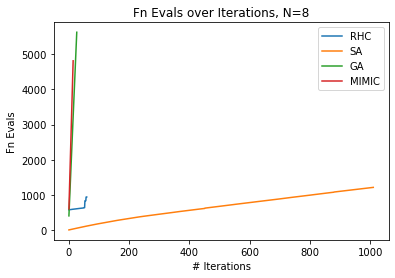

In [2]:
rhc_fn_evals = []
sa_fn_evals = []
ga_fn_evals = []
mimic_fn_evals = []

for i in range(5):
    tmp = joblib.load(f"queens/rhc/max_attempts{25},restarts{100},run{i}_curve.pkl")
    tmp2 = joblib.load(f"queens/sa/max_attempts{75},temp{5},run{i}_curve.pkl")
    tmp3 = joblib.load(f"queens/ga/max_attempts{10},pop{200},mut{0.3},run{i}_curve.pkl")
    tmp4 = joblib.load(f"queens/mimic/pop{300},mut{0.2},run{i}_curve.pkl")

    rhc_fn_evals.append(tmp[1].values)
    sa_fn_evals.append(tmp2[1].values)
    ga_fn_evals.append(tmp3[1].values)
    mimic_fn_evals.append(tmp4[1].values)
    
rhc_fn_evals_avg = helpers.avg_nested_lists(rhc_fn_evals)
sa_fn_evals_avg = helpers.avg_nested_lists(sa_fn_evals)
ga_fn_evals_avg = helpers.avg_nested_lists(ga_fn_evals)
mimic_fn_evals_avg = helpers.avg_nested_lists(mimic_fn_evals)
plt.plot(range(1, len(rhc_fn_evals_avg)+1), rhc_fn_evals_avg, label="RHC")
plt.plot(range(1, len(sa_fn_evals_avg)+1), sa_fn_evals_avg, label="SA")
plt.plot(range(1, len(ga_fn_evals_avg)+1), ga_fn_evals_avg, label="GA")
plt.plot(range(1, len(mimic_fn_evals_avg)+1), mimic_fn_evals_avg, label="MIMIC")
plt.legend(["RHC", "SA", "GA", "MIMIC"])
plt.legend(loc="best")
plt.xlabel("# Iterations")
plt.ylabel("Fn Evals")
plt.title("Fn Evals over Iterations, N=8")

In [8]:
Ns = [2, 4, 8, 10, 15, 20, 25, 50, 100, 125]
rhc_run_times = []
rhc_best_fitnesses = []
rhc_fitness_per_iteration = []
rhc_fn_evals_per_iteration = []
for n in Ns:
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        prob = mlr.DiscreteOpt(int(n), eval_func, max_val=n)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.random_hill_climb(prob, max_attempts=25, restarts=75, random_state=np.random.seed(), max_iters=1000, curve=True)
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
    
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    rhc_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    rhc_fitness_per_iteration.append(c_avgs)

    avg_fitness = np.mean(best_fitnesses)
    rhc_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    rhc_run_times.append(avg_run_time)


In [9]:
rhc_best_fitnesses

[0.0, 6.0, 28.0, 44.2, 103.2, 186.8, 296.2, 1211.8, 4915.6, 7706.8]

In [10]:
Ns = [2, 4, 8, 10, 15, 20, 25, 50, 100, 125]
sa_run_times = []
sa_best_fitnesses = []
sa_fitness_per_iteration = []
sa_fn_evals_per_iteration = []
for n in Ns:
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        prob = mlr.DiscreteOpt(int(n), eval_func, max_val=n)
        start_time = time.perf_counter()

        best_state, best_fitness, curve = mlr.simulated_annealing(prob, max_attempts=75, schedule=mlr.GeomDecay(init_temp=100), max_iters=1000, curve=True)
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
    
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    sa_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    sa_fitness_per_iteration.append(c_avgs)

    avg_fitness = np.mean(best_fitnesses)
    sa_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    sa_run_times.append(avg_run_time)


In [11]:
sa_best_fitnesses, sa_run_times

([0.0, 6.0, 27.8, 44.2, 103.6, 187.6, 297.2, 1214.6, 4919.4, 7708.8],
 [0.02650445039907936,
  0.024548792201676405,
  0.0606722348020412,
  0.09703618820058182,
  0.19090385079907718,
  0.3489253325999016,
  0.5688328591990285,
  2.200865361196338,
  9.036664173795725,
  15.054388567002025])

In [12]:
def queens_max(state):
   # Initialize counter
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                   # If no attacks, then increment counter
                    fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlr.CustomFitness(queens_max)
eval_func = fitness_cust

In [13]:
Ns = [2, 4, 8, 10, 15, 20, 25, 50, 100, 125]
ga_run_times = []
ga_best_fitnesses = []
ga_fitness_per_iteration = []
ga_fn_evals_per_iteration = []
for n in Ns:
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        prob = mlr.DiscreteOpt(int(n), eval_func, max_val=n)
        start_time = time.perf_counter()

        (best_state, best_fitness, curve) = mlr.genetic_alg(
            prob,
            pop_size=200,
            mutation_prob = 0.3,
            max_iters=1000,
            curve=True,
        )
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
    
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    ga_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    ga_fitness_per_iteration.append(c_avgs)

    avg_fitness = np.mean(best_fitnesses)
    ga_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    ga_run_times.append(avg_run_time)

In [14]:
ga_best_fitnesses

[0.0, 6.0, 26.8, 42.4, 99.4, 183.2, 288.6, 1195.0, 4873.2, 7657.2]

In [15]:
Ns = [2, 4, 8, 10, 15, 20, 25, 50, 100, 125]
mimic_run_times = []
mimic_best_fitnesses = []
mimic_fitness_per_iteration = []
mimic_fn_evals_per_iteration = []
for n in Ns:
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        prob = mlr.DiscreteOpt(int(n), eval_func, max_val=n)
        start_time = time.perf_counter()

        best_state, best_fitness, curve = mlr.mimic(
            prob,
            pop_size=200,
            keep_pct=0.3,
            max_iters=1000,
            curve=True,
        )
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
    
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    mimic_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    mimic_fitness_per_iteration.append(c_avgs)

    avg_fitness = np.mean(best_fitnesses)
    mimic_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    mimic_run_times.append(avg_run_time)

In [16]:
mimic_best_fitnesses

[0.0, 6.0, 27.2, 43.4, 100.8, 183.6, 290.4, 1198.2, 4876.4, 7640.6]

Text(0.5, 1.0, 'Best Fitness over N')

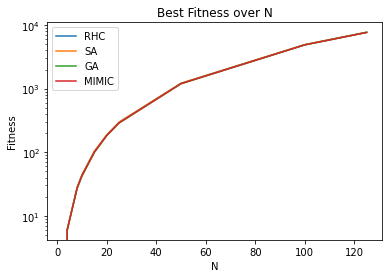

In [17]:
plt.plot(Ns, rhc_best_fitnesses, label="RHC")
plt.plot(Ns, sa_best_fitnesses, label="SA")
plt.plot(Ns, ga_best_fitnesses, label="GA")
plt.plot(Ns, mimic_best_fitnesses, label="MIMIC")
plt.legend(["RHC", "SA", "GA", "MIMIC"])
plt.legend(loc="best")
plt.xlabel("N")
plt.ylabel("Fitness")
plt.yscale("log")
plt.title("Best Fitness over N")

Text(0.5, 1.0, 'Run Time over N')

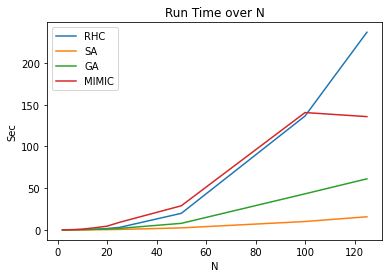

In [124]:
plt.plot(Ns, rhc_run_times, label="RHC")
plt.plot(Ns, sa_run_times, label="SA")
plt.plot(Ns, ga_run_times, label="GA")
plt.plot(Ns, mimic_run_times, label="MIMIC")
plt.ylabel("Sec")
plt.xlabel("N")
plt.legend(["RHC", "SA", "GA", "MIMIC"])
plt.title("Run Time over N")